In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Coefficient of variation and Fano factor (4 points)

In [3]:
## Load spike times
spike_times = np.loadtxt('SpikeTimes.dat') # in [ms]
spike_times /= 1000 # [ms] to [s].

assert spike_times.shape[0] == 100  # maximum spike-time index.
assert spike_times.shape[1] == 100  # number of trials.

In [4]:
T = 5.5 # # trial length in [s]
time_resolution = 0.0001 # [s]

### (1.a) Make a raster plot of the data.

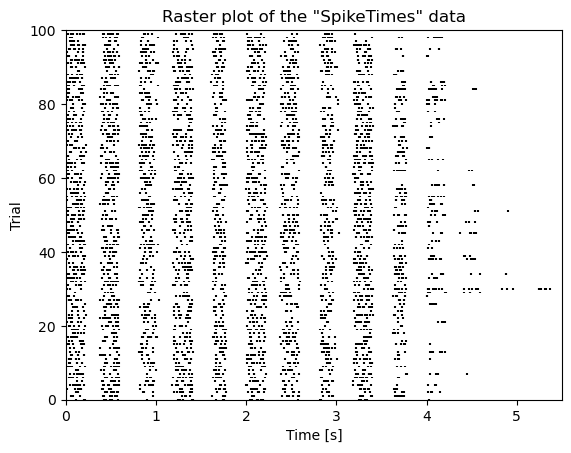

In [5]:
# @param positions: rows are trial and column are spike times.
plt.eventplot(positions=spike_times.T, linelengths=0.5, lineoffsets=1, colors='black')
plt.ylim(0, 100)
plt.xlim(0, T)
plt.title('Raster plot of the "SpikeTimes" data')
plt.xlabel('Time [s]')
plt.ylabel('Trial')
plt.show()

### (1.b) Plot a histogram of the ISIs pooled across trials.

Text(0, 0.5, 'Count')

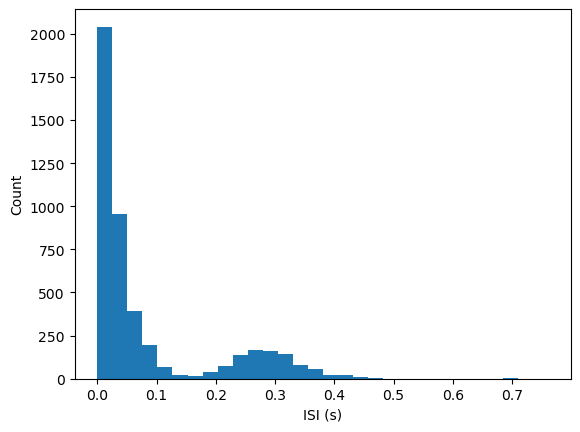

In [6]:
isi = np.diff(spike_times, axis = 0)

fig, ax = plt.subplots()
ax.hist(isi.reshape(-1), bins=30) # shows ISIs histogram for all trials (Exponential)
# ax.hist(np.mean(isi, axis = 1)) # shows the mean ISI for each trial (pooling within trials) (gaussian by central limit theory)
ax.set_xlabel('ISI (s)')
ax.set_ylabel('Count')

## ISIs are approximatly exponentially decaying

# (1.c) Compute the coefficient of variation CV from the pooled ISIs.

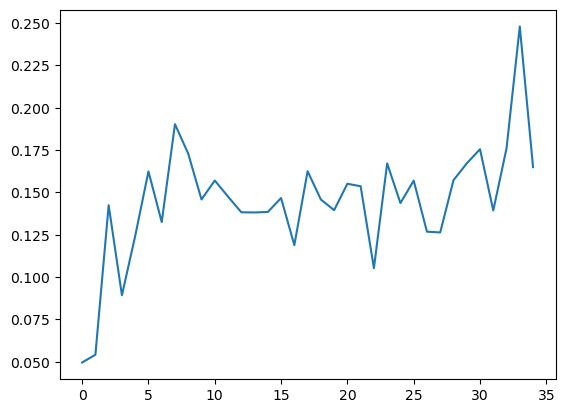

In [14]:

cvs = np.var(isi, axis = 1)/np.mean(isi,axis = 1)
plt.plot(cvs)

# (1.d) Compute and plot both the trial-resolved and the time-resolved Fano factor 

In [23]:
def get_ffs(win_size, spike_times):

    counts_trials = np.zeros((np.int(np.ceil(5.5/win_size)),100))
    win_num = 0
    for start in np.arange(0,5.5,win_size):
            
            con = np.logical_and( (start<spike_times), (spike_times<=start+win_size))
            vals = np.where(con, spike_times,np.nan )
            test = np.count_nonzero(np.isnan(vals), axis = 0)
            counts_trials[win_num,:] = 100 - np.count_nonzero(np.isnan(vals), axis = 0)
            win_num +=1

    ffs_time_resolved = np.var(counts_trials, axis = 1)/np.mean(counts_trials, axis = 1)
    ffs_trial_resolved = np.var(counts_trials, axis = 0)/np.mean(counts_trials, axis = 0)
    return ffs_time_resolved , ffs_trial_resolved

C:\Users\Ammar El-Saeed\AppData\Local\Temp\ipykernel_9140\2847947753.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts_trials = np.zeros((np.int(np.ceil(5.5/win_size)),100))
C:\Users\Ammar El-Saeed\AppData\Local\Temp\ipykernel_9140\2847947753.py:13: RuntimeWarning: invalid value encountered in true_divide
  ffs_time_resolved = np.var(counts_trials, axis = 1)/np.mean(counts_trials, axis = 1)


Text(0.5, 1.0, 'Trial resolved Fano factor')

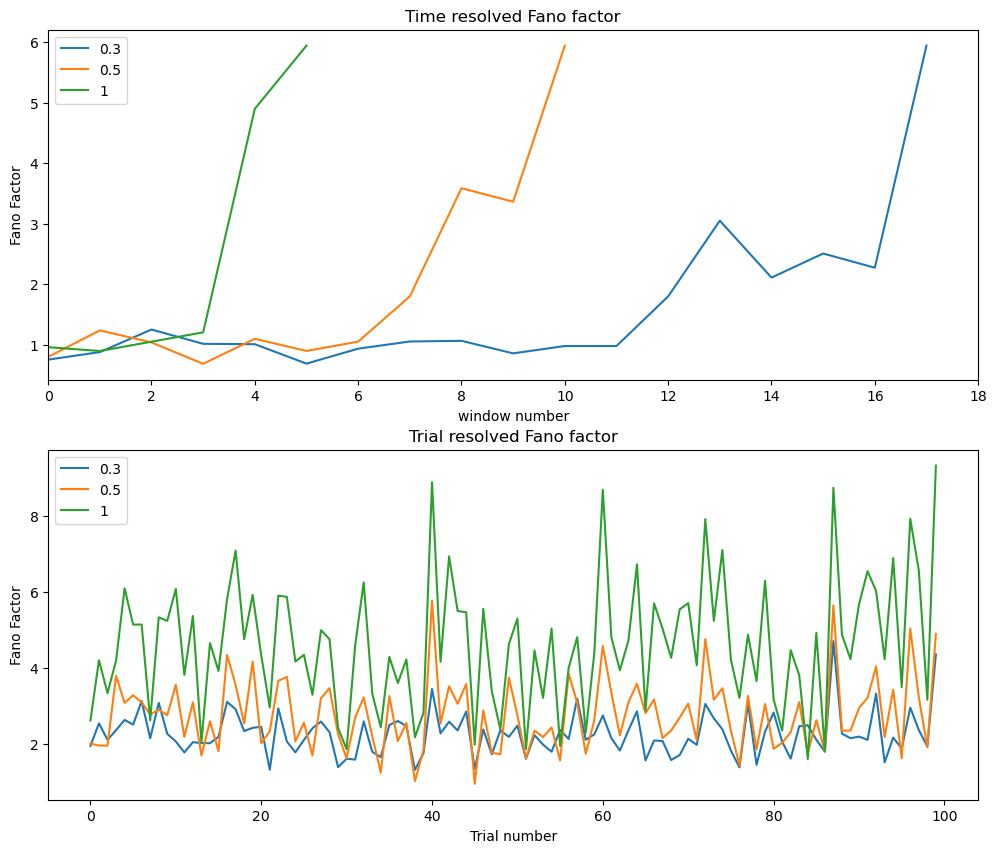

In [17]:

t_w = [0.3,0.5,1]
fig, axs = plt.subplots(2, figsize = (12,10)) 
for win in t_w:
    ffs_time_resolved,ffs_trial_resolved =  get_ffs(win, spike_times)
    axs[0].plot(ffs_time_resolved)
    axs[1].plot(ffs_trial_resolved)

axs[0].set_xlabel('window number')
axs[0].set_ylabel('Fano Factor')
axs[0].legend(['0.3','0.5','1'])
axs[0].set_title('Time resolved Fano factor')
axs[0].set_xlim((0,18))
axs[1].set_xlabel('Trial number')
axs[1].set_ylabel('Fano Factor')
axs[1].legend(['0.3','0.5','1'])
axs[1].set_title('Trial resolved Fano factor')

## A bigger window size brings the FF closer to the theoritical value of 1 for homogenous poisson processes

# Q2    


In [42]:
import scipy.io
mat = scipy.io.loadmat('PoissonSpikeTrains.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'SpikeTimes_hom', 'SpikeTimes_inh', 'SpikeTimes_ref', 'rates_ref'])

In [43]:
mat['SpikeTimes_inh'].shape

(1, 1000)

# (2.a) Construct and plot the ISIs histograms. How are they different?

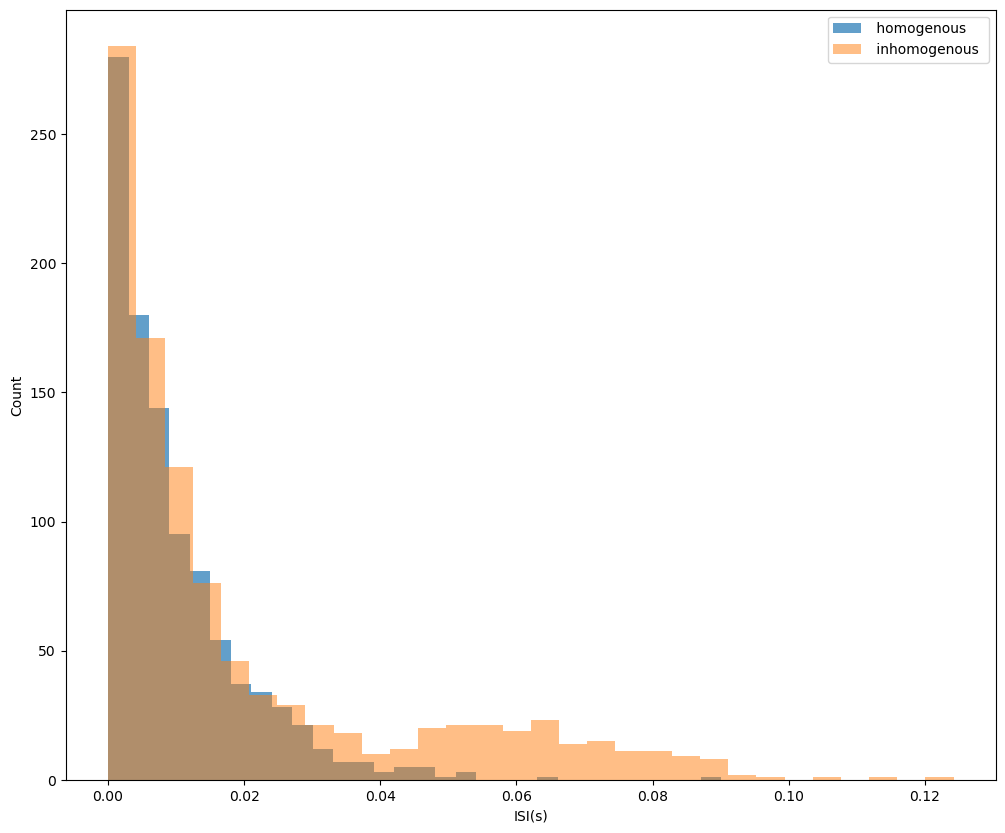

In [44]:
isi_hom = np.diff(mat['SpikeTimes_hom']/1000, axis = 1)
fig, ax = plt.subplots(1, figsize= (12,10))
ax.hist(isi_hom.flatten(), bins=30, alpha = 0.7) # shows ISIs histogram for all trials (Exponential)
# ax.hist(np.mean(isi, axis = 1)) # shows the mean ISI for each trial (pooling within trials) (gaussian by central limit theory)
ax.set_xlabel('ISI(s)')
ax.set_ylabel('Count')

isi_inh = np.diff(mat['SpikeTimes_inh']/1000, axis = 1)
ax.hist(isi_inh.flatten(), bins=30, alpha = 0.5) # shows ISIs histogram for all trials (Exponential)
ax.legend([' homogenous ',' inhomogenous '])


# the homogenous poisson process has ISI that are exponentialy distributed. while the inhomogenous process has a distribution that looks a bit bimodal

# (2.b) Compute the CV and the Fano factor. 

In [45]:
cv_homogenous = np.std(isi_hom)/np.mean(isi_hom)
cv_inh = np.std(isi_inh)/np.mean(isi_inh)
cv_homogenous , cv_inh

(1.0126965180137775, 1.1805742873016383)

In [46]:
hom_spikeTimes = mat['SpikeTimes_hom']/1000
inh_spikeTimes = mat['SpikeTimes_inh']/1000


In [48]:

# win_size = 0.1

# counts_trials = np.zeros((np.int(np.ceil(5.5/win_size)),1000))
# win_num = 0
# for start in np.arange(0,5.5,win_size):
        
#         con = np.logical_and( (start<=hom_spikeTimes), (hom_spikeTimes<=start+win_size))
#         vals = np.where(con, hom_spikeTimes,np.nan )
#         test = np.count_nonzero(np.isnan(vals), axis = 0)
#         counts_trials[win_num,:] = 1000 - np.count_nonzero(np.isnan(vals), axis = 0)
#         win_num +=1

# ffs_time_resolved = np.var(counts_trials, axis = 1)/np.mean(counts_trials, axis = 1)
# ffs_trial_resolved = np.var(counts_trials, axis = 0)/np.mean(counts_trials, axis = 0)
# plt.plot(ffs_time_resolved)